# Step 1: Import Libraries and Load Data

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r"E:\Unified Mentor\Coca Cola Stock- Live and Updated\Coca-Cola_stock_history.csv", parse_dates=['Date'])
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0
5,1962-01-09,0.047664,0.048778,0.047292,0.048530,960000,0.0,0
6,1962-01-10,0.048530,0.049459,0.048035,0.048778,1612800,0.0,0
7,1962-01-11,0.048778,0.049273,0.048530,0.049273,614400,0.0,0
8,1962-01-12,0.049273,0.049273,0.048406,0.048902,883200,0.0,0
9,1962-01-15,0.048778,0.048778,0.048283,0.048406,614400,0.0,0


# Step 2: Data Cleaning

In [132]:
# Check Data Types and Missing Values:
# Identify the data types of each column and check for any missing values in the dataset.

print("Data types and missing values:")
df.info()
print()
print("Missing values before cleaning:")
print(df.isnull().sum())
print()

# Handle missing values
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')  
df = df.drop_duplicates() 
df = df.reset_index(drop=True) 

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB

Missing values before cleaning:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


Missing values after cleaning:
Date            8840
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends         

# Step 3: Exploratory Data Analysis (EDA)

In [134]:
# Basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6471,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,1990-04-14 23:08:09.012517376,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
min,1962-01-02 00:00:00,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,1976-01-17 12:00:00,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,1989-03-08 00:00:00,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,2004-02-24 12:00:00,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,2022-03-11 00:00:00,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000
std,NaN,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148


In [136]:
# Correlations Matrix
print("\nCorrelations Matrix:")
df.corr(numeric_only = True)


Correlations Matrix:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999957,0.999945,0.999910,0.456138,0.095580,-0.008980
High,0.999957,1.000000,0.999927,0.999954,0.457375,0.095182,-0.009046
Low,0.999945,0.999927,1.000000,0.999956,0.454299,0.095109,-0.009038
Close,0.999910,0.999954,0.999956,1.000000,0.455750,0.094982,-0.009009
Volume,0.456138,0.457375,0.454299,0.455750,1.000000,0.058258,-0.000433
Dividends,0.095580,0.095182,0.095109,0.094982,0.058258,1.000000,-0.001780
Stock Splits,-0.008980,-0.009046,-0.009038,-0.009009,-0.000433,-0.001780,1.000000


In [138]:
# Date range
print("\nDate Range:")
print(f"From: {df['Date'].min()} To: {df['Date'].max()}")
print(f"Total days: {(df['Date'].max() - df['Date'].min()).days}")


Date Range:
From: 1962-01-02 00:00:00 To: 2022-03-11 00:00:00
Total days: 21983


# Step 4: Visualizing Key Insights

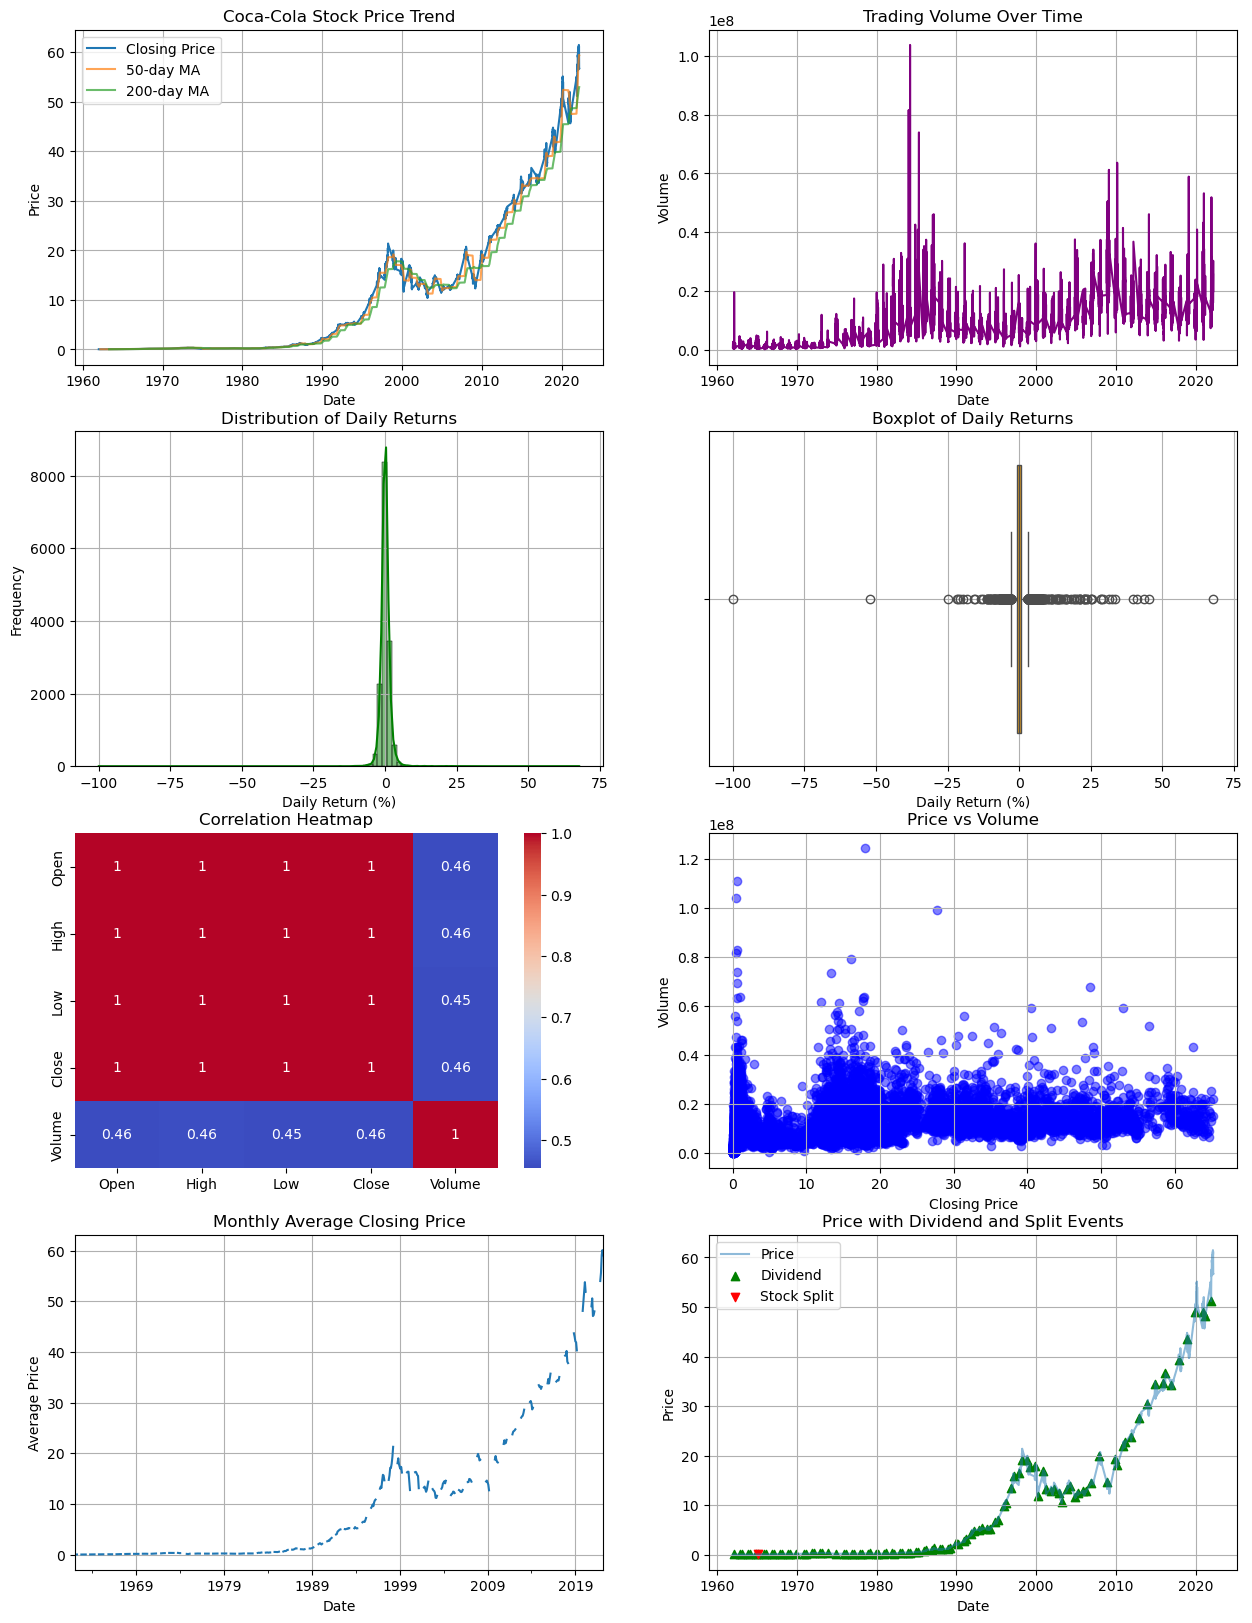

In [140]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100

# Calculate moving averages
df['50_day_MA'] = df['Close'].rolling(window=50).mean()
df['200_day_MA'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(15, 20))

# 1. Price Trend Over Time
plt.subplot(4, 2, 1)
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['50_day_MA'], label='50-day MA', alpha=0.7)
plt.plot(df['Date'], df['200_day_MA'], label='200-day MA', alpha=0.7)
plt.title('Coca-Cola Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# 2. Volume Trend
plt.subplot(4, 2, 2)
plt.plot(df['Date'], df['Volume'], color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

# 3. Daily Returns Distribution
plt.subplot(4, 2, 3)
sns.histplot(df['Daily_Return'].dropna(), bins=100, color='green', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)

# 4. Boxplot of Daily Returns
plt.subplot(4, 2, 4)
sns.boxplot(x=df['Daily_Return'].dropna(), color='orange')
plt.title('Boxplot of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.grid(True)

# 5. Correlation Heatmap
plt.subplot(4, 2, 5)
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 6. Price vs Volume Scatter
plt.subplot(4, 2, 6)
plt.scatter(df['Close'], df['Volume'], alpha=0.5, color='blue')
plt.title('Price vs Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)

# 7. Monthly Average Closing Price
plt.subplot(4, 2, 7)
monthly_avg = df.resample('M', on='Date')['Close'].mean()
monthly_avg.plot()
plt.title('Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)

# 8. Dividend and Stock Split Events
# Filter Dividend and Stock Split Data Properly
dividends_data = df[df['Dividends'] > 0][['Date', 'Close']]
splits_data = df[df['Stock Splits'] > 0][['Date', 'Close']]

# Plot Closing Price
plt.subplot(4, 2, 8)
plt.plot(df['Date'], df['Close'], label='Price', alpha=0.5)

# Scatter Plot for Dividend Events (Ensure Date & Close columns are same size)
plt.scatter(dividends_data['Date'], dividends_data['Close'], 
            color='green', label='Dividend', marker='^')

# Scatter Plot for Stock Split Events (Ensure Date & Close columns are same size)
plt.scatter(splits_data['Date'], splits_data['Close'], 
            color='red', label='Stock Split', marker='v')

plt.title('Price with Dividend and Split Events')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

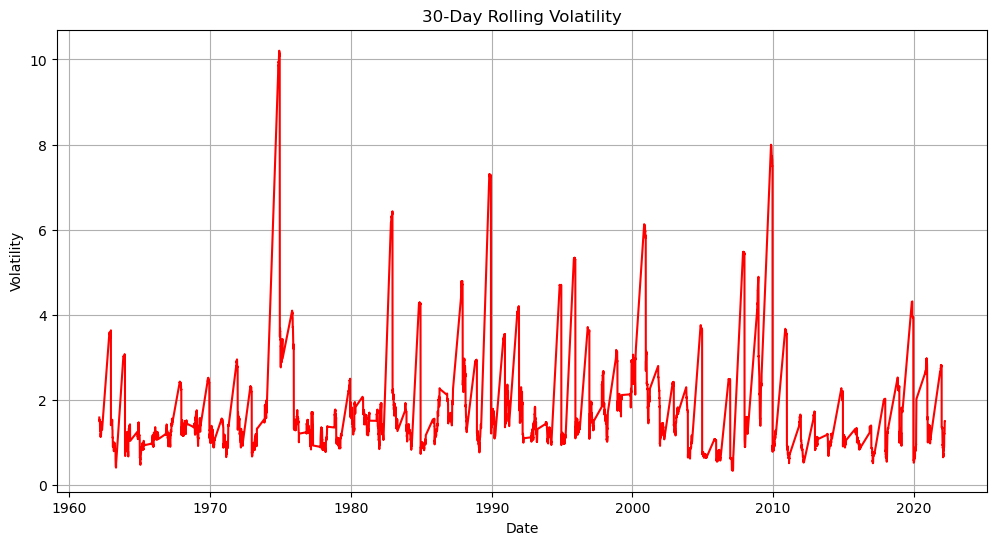

In [142]:
# Volatility over time
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], color='red')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

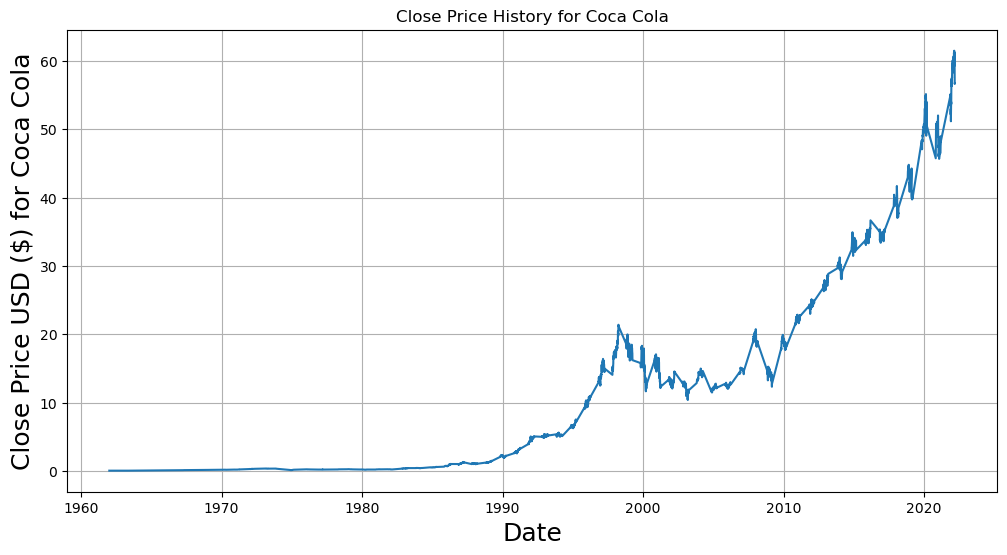

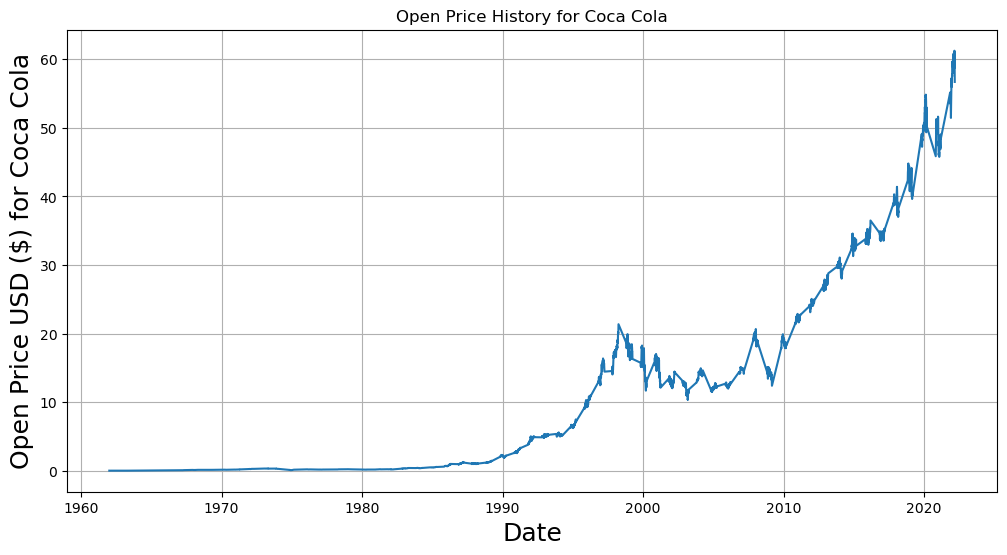

In [144]:
# Close and Open Price History for Coca Cola

def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(12,6))  # Indentation fixed
    plt.title(column + ' Price History for ' + stock)
    plt.plot(data_frame['Date'], data_frame[column])  # Ensure Date is on the x-axis
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.grid(True)
    plt.show()

# Test the function
plot_close_val(df, 'Close', 'Coca Cola')
plot_close_val(df, 'Open', 'Coca Cola')
